In [1]:
#!pip3 install matplotlib

In [2]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("2007-2016-Homelessnewss-USA.csv",thousands=",")


In [4]:
df.head

<bound method NDFrame.head of            Year State CoC Number               CoC Name  \
0      1/1/2007    AK     AK-500          Anchorage CoC   
1      1/1/2007    AK     AK-500          Anchorage CoC   
2      1/1/2007    AK     AK-500          Anchorage CoC   
3      1/1/2007    AK     AK-500          Anchorage CoC   
4      1/1/2007    AK     AK-500          Anchorage CoC   
...         ...   ...        ...                    ...   
86524  1/1/2016    WY     WY-500  Wyoming Statewide CoC   
86525  1/1/2016    WY     WY-500  Wyoming Statewide CoC   
86526  1/1/2016    WY     WY-500  Wyoming Statewide CoC   
86527  1/1/2016    WY     WY-500  Wyoming Statewide CoC   
86528  1/1/2016    WY     WY-500  Wyoming Statewide CoC   

                                                Measures  Count  
0                       Chronically Homeless Individuals    224  
1                                   Homeless Individuals    696  
2                            Homeless People in Families    278

In [5]:
df["Year"] = df["Year"].str.replace("1/1/","")
df.describe

<bound method NDFrame.describe of        Year State CoC Number               CoC Name  \
0      2007    AK     AK-500          Anchorage CoC   
1      2007    AK     AK-500          Anchorage CoC   
2      2007    AK     AK-500          Anchorage CoC   
3      2007    AK     AK-500          Anchorage CoC   
4      2007    AK     AK-500          Anchorage CoC   
...     ...   ...        ...                    ...   
86524  2016    WY     WY-500  Wyoming Statewide CoC   
86525  2016    WY     WY-500  Wyoming Statewide CoC   
86526  2016    WY     WY-500  Wyoming Statewide CoC   
86527  2016    WY     WY-500  Wyoming Statewide CoC   
86528  2016    WY     WY-500  Wyoming Statewide CoC   

                                                Measures  Count  
0                       Chronically Homeless Individuals    224  
1                                   Homeless Individuals    696  
2                            Homeless People in Families    278  
3             Sheltered Chronically Homel

In [36]:
df.astype({'Count': 'int32'})

,Year,State,CoC Number,CoC Name,Measures,Count
0,2007,AK,AK-500,Anchorage CoC,Chronically Homeless Individuals,224
1,2007,AK,AK-500,Anchorage CoC,Homeless Individuals,696
2,2007,AK,AK-500,Anchorage CoC,Homeless People in Families,278
3,2007,AK,AK-500,Anchorage CoC,Sheltered Chronically Homeless Individuals,187
4,2007,AK,AK-500,Anchorage CoC,Sheltered Homeless,842
...,...,...,...,...,...,...
86524,2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Unaccompanied Youth (Unde...,7
86525,2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Homeless Veterans,31
86526,2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth (Under 25),3
86527,2016,WY,WY-500,Wyoming Statewide CoC,Unsheltered Parenting Youth Age 18-24,3


In [9]:
#df.loc[]

In [10]:
def compareYears(yr1, yr2):
     return df[df['Measures'] == "Total Homeless"][df['Year'] == yr1].groupby(["State"]).sum() - df[df['Measures'] == "Total Homeless"][df['Year'] == yr2].groupby(["State"]).sum() 

In [11]:
compareYears("2007","2009")

,Count
State,
AK,-350
AL,-628
AR,984
AZ,-75
CA,15308
CO,-1043
CT,-123
DC,-908
DE,-69


In [12]:
set(df["Measures"].values)

{'Children of Parenting Youth',
 'Chronically Homeless',
 'Chronically Homeless Individuals',
 'Chronically Homeless People in Families',
 'Homeless Individuals',
 'Homeless People in Families',
 'Homeless Unaccompanied Children (Under 18)',
 'Homeless Unaccompanied Young Adults (Age 18-24)',
 'Homeless Unaccompanied Youth (Under 25)',
 'Homeless Veterans',
 'Parenting Youth (Under 25)',
 'Parenting Youth Age 18-24',
 'Parenting Youth Under 18',
 'Sheltered Children of Parenting Youth',
 'Sheltered Chronically Homeless',
 'Sheltered Chronically Homeless Individuals',
 'Sheltered Chronically Homeless People in Families',
 'Sheltered Homeless',
 'Sheltered Homeless Individuals',
 'Sheltered Homeless People in Families',
 'Sheltered Homeless Unaccompanied Children (Under 18)',
 'Sheltered Homeless Unaccompanied Young Adults (Age 18-24)',
 'Sheltered Homeless Unaccompanied Youth (Under 25)',
 'Sheltered Homeless Veterans',
 'Sheltered Parenting Youth (Under 25)',
 'Sheltered Parenting Yout

In [15]:
def plotMeasureOverTime(state,measure):
    pltData = df[df['Measures'] == measure][df['State']==state].groupby(["Year"]).sum()
    plt.plot(pltData)

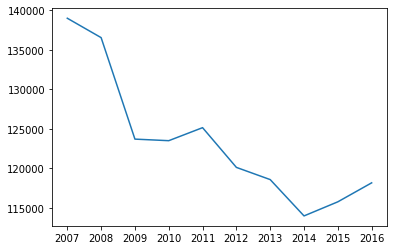

In [16]:
plotMeasureOverTime("CA","Total Homeless")

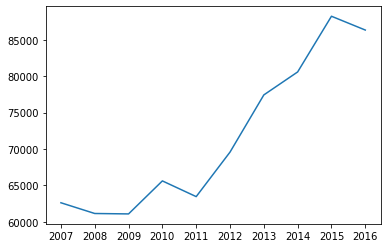

In [17]:
plotMeasureOverTime("NY","Total Homeless")

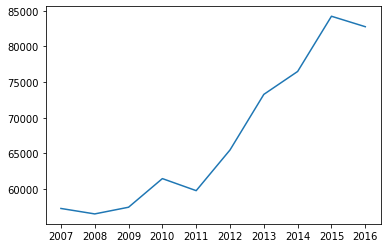

In [18]:
plotMeasureOverTime("NY","Sheltered Homeless")

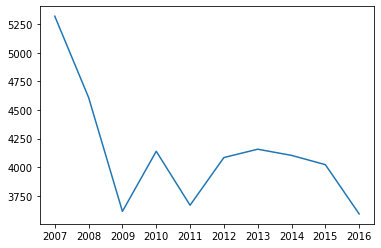

In [19]:
plotMeasureOverTime("NY","Unsheltered Homeless")

In [21]:
df[df['Measures'] == "Total Homeless"][df['State']=="NY"][df["Year"]=="2016"].sort_values("Count")

,Year,State,CoC Number,CoC Name,Measures,Count
81432,2016,NY,NY-514,Jamestown/Dunkirk/Chautauqua County CoC,Total Homeless,23
81096,2016,NY,NY-504,Cattaragus County CoC,Total Homeless,27
81600,2016,NY,NY-520,Franklin County CoC,Total Homeless,27
81390,2016,NY,NY-513,"Wayne, Ontario, Seneca, Yates Counties CoC",Total Homeless,58
81264,2016,NY,NY-510,Ithaca/Tompkins County CoC,Total Homeless,86
81558,2016,NY,NY-519,Columbia/Greene County CoC,Total Homeless,116
81642,2016,NY,NY-522,Jefferson/Lewis/St. Lawrence Counties CoC,Total Homeless,119
81474,2016,NY,NY-516,Clinton County CoC,Total Homeless,132
81936,2016,NY,NY-606,Rockland County CoC,Total Homeless,141
81516,2016,NY,NY-518,"Utica/Rome/Oneida, Madison Counties CoC",Total Homeless,160


In [24]:
df[df['Measures'] == "Total Homeless"][df['State']=="NY"][df["Year"]=="2007"].sort_values("Count")

,Year,State,CoC Number,CoC Name,Measures,Count
3379,2007,NY,NY-515,Cortland County CoC,Total Homeless,0
3427,2007,NY,NY-520,Franklin County CoC,Total Homeless,28
3547,2007,NY,NY-609,Putnam County CoC,Total Homeless,31
3391,2007,NY,NY-516,Clinton County CoC,Total Homeless,53
3367,2007,NY,NY-514,Jamestown/Dunkirk/Chautauqua County CoC,Total Homeless,75
3319,2007,NY,NY-510,Ithaca/Tompkins County CoC,Total Homeless,78
3355,2007,NY,NY-513,"Wayne, Ontario, Seneca, Yates Counties CoC",Total Homeless,98
3271,2007,NY,NY-504,Cattaragus County CoC,Total Homeless,142
3247,2007,NY,NY-501,"Elmira/Steuben, Allegany, Livingston, Chemung,...",Total Homeless,175
3343,2007,NY,NY-512,Troy/Rensselaer County CoC,Total Homeless,212


In [30]:
df[df['Measures'] == "Total Homeless"][df["Year"]=="2016"].sort_values("Count",ascending=False).head(10)

,Year,State,CoC Number,CoC Name,Measures,Count
81726,2016,NY,NY-600,New York City CoC,Total Homeless,73523
71730,2016,CA,CA-600,Los Angeles City & County CoC,Total Homeless,43854
85884,2016,WA,WA-500,Seattle/King County CoC,Total Homeless,10730
71772,2016,CA,CA-601,San Diego City and County CoC,Total Homeless,8669
72528,2016,DC,DC-500,District of Columbia CoC,Total Homeless,8350
70554,2016,CA,CA-501,San Francisco CoC,Total Homeless,6996
70512,2016,CA,CA-500,San Jose/Santa Clara City & County CoC,Total Homeless,6524
76098,2016,MA,MA-500,Boston CoC,Total Homeless,6240
80844,2016,NV,NV-500,Las Vegas/Clark County CoC,Total Homeless,6208
83070,2016,PA,PA-500,Philadelphia CoC,Total Homeless,6112


In [97]:
df[df['Measures'] == "Total Homeless"][df["Year"]=="2007"].sort_values("Count",ascending=False).head(10)

,Year,State,CoC Number,CoC Name,Measures,Count
3451,2007,NY,NY-600,New York City CoC,Total Homeless,50372
595,2007,CA,CA-600,Los Angeles City & County CoC,Total Homeless,47862
2251,2007,MI,MI-501,Detroit CoC,Total Homeless,18062
4315,2007,TX,TX-607,Texas Balance of State (BoS) CoC,Total Homeless,12958
4351,2007,TX,TX-700,"Houston, Pasadena, Conroe/Harris, Ft. Bend, Mo...",Total Homeless,10363
1171,2007,GA,GA-501,Georgia Balance of State CoC,Total Homeless,10255
763,2007,CO,CO-503,Metropolitan Denver Homeless Initiative,Total Homeless,8698
259,2007,AZ,AZ-502,Phoenix/Mesa/Maricopa County Regional CoC,Total Homeless,8448
4639,2007,WA,WA-500,Seattle/King County CoC,Total Homeless,7902
3847,2007,PA,PA-500,Philadelphia CoC,Total Homeless,7640


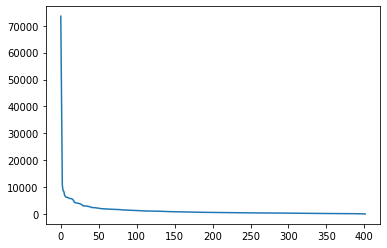

In [63]:
pltdata = df[df['Measures'] == "Total Homeless"][df["Year"]=="2016"].sort_values("Count",ascending=False)[["CoC Name","Count"]]
plt.plot(range(0 ,len(pltdata["Count"])),pltdata["Count"])

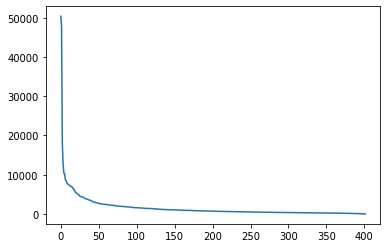

In [64]:
pltdata = df[df['Measures'] == "Total Homeless"][df["Year"]=="2007"].sort_values("Count",ascending=False)[["CoC Name","Count"]]
plt.plot(range(0 ,len(pltdata["Count"])),pltdata["Count"])

In [99]:
#What % of homeless ppl in the US live in NYC

total = df[df['Measures'] == "Total Homeless"][["Count","Year"]].groupby(["Year"]).sum()
total["NYC"] = df[df['Measures'] == "Total Homeless"][df["CoC Number"]=="NY-600"]["Count"].values
total["LA"] = df[df['Measures'] == "Total Homeless"][df["CoC Number"]=="CA-600"]["Count"].values
total["Seattle"] = df[df['Measures'] == "Total Homeless"][df["CoC Number"]=="WA-500"]["Count"].values
total["Detroit"] = df[df['Measures'] == "Total Homeless"][df["CoC Number"]=="MI-501"]["Count"].values
total["NYC Ratio"] = total["NYC"]/total["Count"]
total["LA Ratio"] = total["LA"]/total["Count"]

total



,Count,NYC,LA,Seattle,Detroit,NYC Ratio,LA Ratio
Year,,,,,,,
2007,647258,50372,47862,7902,18062,0.077824,0.073946
2008,639784,50261,47862,8501,18062,0.078559,0.074810
2009,630227,49343,33243,8952,3694,0.078294,0.052748
2010,637077,53187,33243,9022,2812,0.083486,0.052181
2011,623788,51123,34622,8972,3138,0.081956,0.055503
2012,621553,56672,31553,8899,3115,0.091178,0.050765
2013,590364,64060,35524,9106,2789,0.108509,0.060173
2014,576450,67810,34393,8949,2755,0.117634,0.059663
2015,564708,75323,41174,10122,2597,0.133384,0.072912


array([50372, 50261, 49343, 53187, 51123, 56672, 64060, 67810, 75323,
       73523])